In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%config InlineBackend.figure_format='retina'
warnings.filterwarnings('ignore')

train = pd.read_csv('train_dataset_hackathon_mkb.csv', encoding='cp1251', sep=';')
test = pd.read_csv('test_dataset_hackathon_mkb.csv', encoding='cp1251', sep=';')

In [2]:
# train data
train.head()

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1100,F1110,F1150,F1160,F1170,...,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,1,1847,01JAN2018:00:00:00,0,0,1.298961e+09,2154000.0,1.125573e+09,NaN,150010000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4650,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4770,01JAN2018:00:00:00,0,0,7.337400e+07,NaN,7.337400e+07,NaN,NaN,...,169.0,168.0,18351739.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
3,4,12237,01JAN2018:00:00:00,0,0,1.937488e+09,122828000.0,6.103280e+08,NaN,809426000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,9988,01JAN2018:00:00:00,1,0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# test data
test.head()

,id_contract,id_client,SIGN_DATE,IP_flag,F1100,F1110,F1150,F1160,F1170,F1180,...,WINNERNUMBER_95_EVER,SIGNEDNUMBER_95_EVER,SUM_95_EVER,FLAG_DISQUALIFICATION,COUNT_CHANGE_YEAR,COUNT_CHANGE_EVER,BIRTHDATE,AGE,SEX_NAME,CITIZENSHIP_NAME
0,17892,3620,08APR2019:00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,17893,4101,08APR2019:00:00:00,0,1906000.0,NaN,1906000.0,NaN,NaN,NaN,...,7439.0,7100.0,1.187411e+09,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,17894,9589,08APR2019:00:00:00,0,147000.0,NaN,147000.0,NaN,NaN,NaN,...,362.0,344.0,9.836260e+07,NaN,1.0,3.0,NaN,NaN,NaN,NaN
3,17895,11546,08APR2019:00:00:00,0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,17896,12558,08APR2019:00:00:00,0,26000.0,NaN,NaN,NaN,26000.0,NaN,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN


### Exploratory Data Analysis

In [5]:
print('Train data:\nAmount of rows: {}\nAmount of columns: {}'.format(train.shape[0], train.shape[1]))
print('\nTest data:\nAmount of rows: {}\nAmount of columns: {}'.format(test.shape[0], test.shape[1]))

Train data:
Amount of rows: 17891
Amount of columns: 124

Test data:
Amount of rows: 7330
Amount of columns: 123


In [6]:
# Convert columns with date to type datetime
def parse_dates(x):
    word = ''
    if x == None:
        return None
    else:
        for i in str(x):
            if i == ':':
                return word
            else:
                word += i

date_columns_list = ['SIGN_DATE', 'DATEFIRSTREG', 'TAXREG_REGDATE', 'TAXREGPAY_REGDATE', 'BIRTHDATE']
for i in range(len(date_columns_list)):
    # Тренировочные данные 
    train[date_columns_list[i]] = train[date_columns_list[i]].apply(parse_dates)
    train[date_columns_list[i]] = pd.to_datetime(train[date_columns_list[i]])
    # Тестовые данные
    test[date_columns_list[i]] = test[date_columns_list[i]].apply(parse_dates)
    test[date_columns_list[i]] = pd.to_datetime(test[date_columns_list[i]])  

In [8]:
# Main information about data
print('Amount of columns with missing values:', len(train.loc[:, train.columns[train.isna().sum() != 0]].isnull().sum()))

Amount of columns with missing values: 119


In [9]:
# Percentage of missing values in each columns
for col in train.columns:
    pct_missing = np.mean(train[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing * 100)))

id_contract - 0%
id_client - 0%
SIGN_DATE - 0%
IP_flag - 0%
TARGET - 0%
F1100 - 61%
F1110 - 92%
F1150 - 65%
F1160 - 98%
F1170 - 92%
F1180 - 86%
F1190 - 92%
F1200 - 34%
F1210 - 46%
F1220 - 82%
F1230 - 36%
F1240 - 84%
F1250 - 35%
F1260 - 76%
F1300 - 34%
F1310 - 57%
F1320 - 99%
F1350 - 95%
F1360 - 92%
F1370 - 58%
F1400 - 76%
F1410 - 86%
F1420 - 87%
F1450 - 96%
F1500 - 35%
F1510 - 71%
F1520 - 36%
F1530 - 96%
F1550 - 95%
F1600 - 34%
F1700 - 34%
F2100 - 58%
F2110 - 36%
F2120 - 39%
F2200 - 36%
F2210 - 74%
F2220 - 83%
F2300 - 36%
F2310 - 98%
F2320 - 84%
F2330 - 80%
F2340 - 58%
F2350 - 40%
F2400 - 36%
F2410 - 50%
F1150_LAG1 - 68%
F1230_LAG1 - 45%
F1410_LAG1 - 90%
F1510_LAG1 - 74%
F1520_LAG1 - 45%
F2110_LAG1 - 45%
F2120_LAG1 - 48%
F2200_LAG1 - 45%
F2210_LAG1 - 77%
F2220_LAG1 - 87%
F2300_LAG1 - 45%
F2320_LAG1 - 85%
F2330_LAG1 - 82%
F2400_LAG1 - 45%
EGRPOINCLUDED - 20%
DATEFIRSTREG - 7%
OKFS_GROUP - 20%
OKOPF_GROUP - 20%
OKOGU_GROUP - 20%
OKATO_REGIONCODE - 7%
OKATO_FED - 7%
OKTMO_CODE - 7%
OKTMO_

In [10]:
# Above information in DataFrame form
columns_with_na = (train.loc[:, train.columns[train.isna().sum() != 0]].isnull().sum() / train.shape[0]) * 100
columns_with_na = columns_with_na.sort_values()
columns_with_na = columns_with_na.to_frame().reset_index().rename(columns={'index': 'column', 0: 'percentage_of_na'})
columns_with_na.head()

,column,percentage_of_na
0,OKVED_CODE,6.701694
1,OKATO_REGIONCODE,7.445084
2,DATEFIRSTREG,7.456263
3,OKATO_FED,7.467442
4,TAXREG_REGDATE,7.473031


In [11]:
# Types of columns
column_types = train.dtypes.reset_index().rename(columns={'index': 'column', 0: 'type'})
column_types.head()

,column,type
0,id_contract,int64
1,id_client,int64
2,SIGN_DATE,datetime64[ns]
3,IP_flag,int64
4,TARGET,int64


In [12]:
# Amount of columns with different types
column_types.groupby('type').count().reset_index()

,type,column
0,int64,4
1,datetime64[ns],5
2,float64,108
3,object,7


In [13]:
# Columns with type object
object_columns = column_types[column_types['type'] == 'object']
object_columns

,column,type
66,OKFS_GROUP,object
67,OKOPF_GROUP,object
68,OKOGU_GROUP,object
73,WORKERSRANGE,object
86,OKVED_CODE,object
122,SEX_NAME,object
123,CITIZENSHIP_NAME,object


In [14]:
# Сводная информация о колонках с пропущенными значениями и их типом
# Main information about columns with missing values and their types
columns_info = pd.merge(columns_with_na, column_types, on='column', how='left')
columns_info.head()

,column,percentage_of_na,type
0,OKVED_CODE,6.701694,object
1,OKATO_REGIONCODE,7.445084,float64
2,DATEFIRSTREG,7.456263,datetime64[ns]
3,OKATO_FED,7.467442,float64
4,TAXREG_REGDATE,7.473031,datetime64[ns]


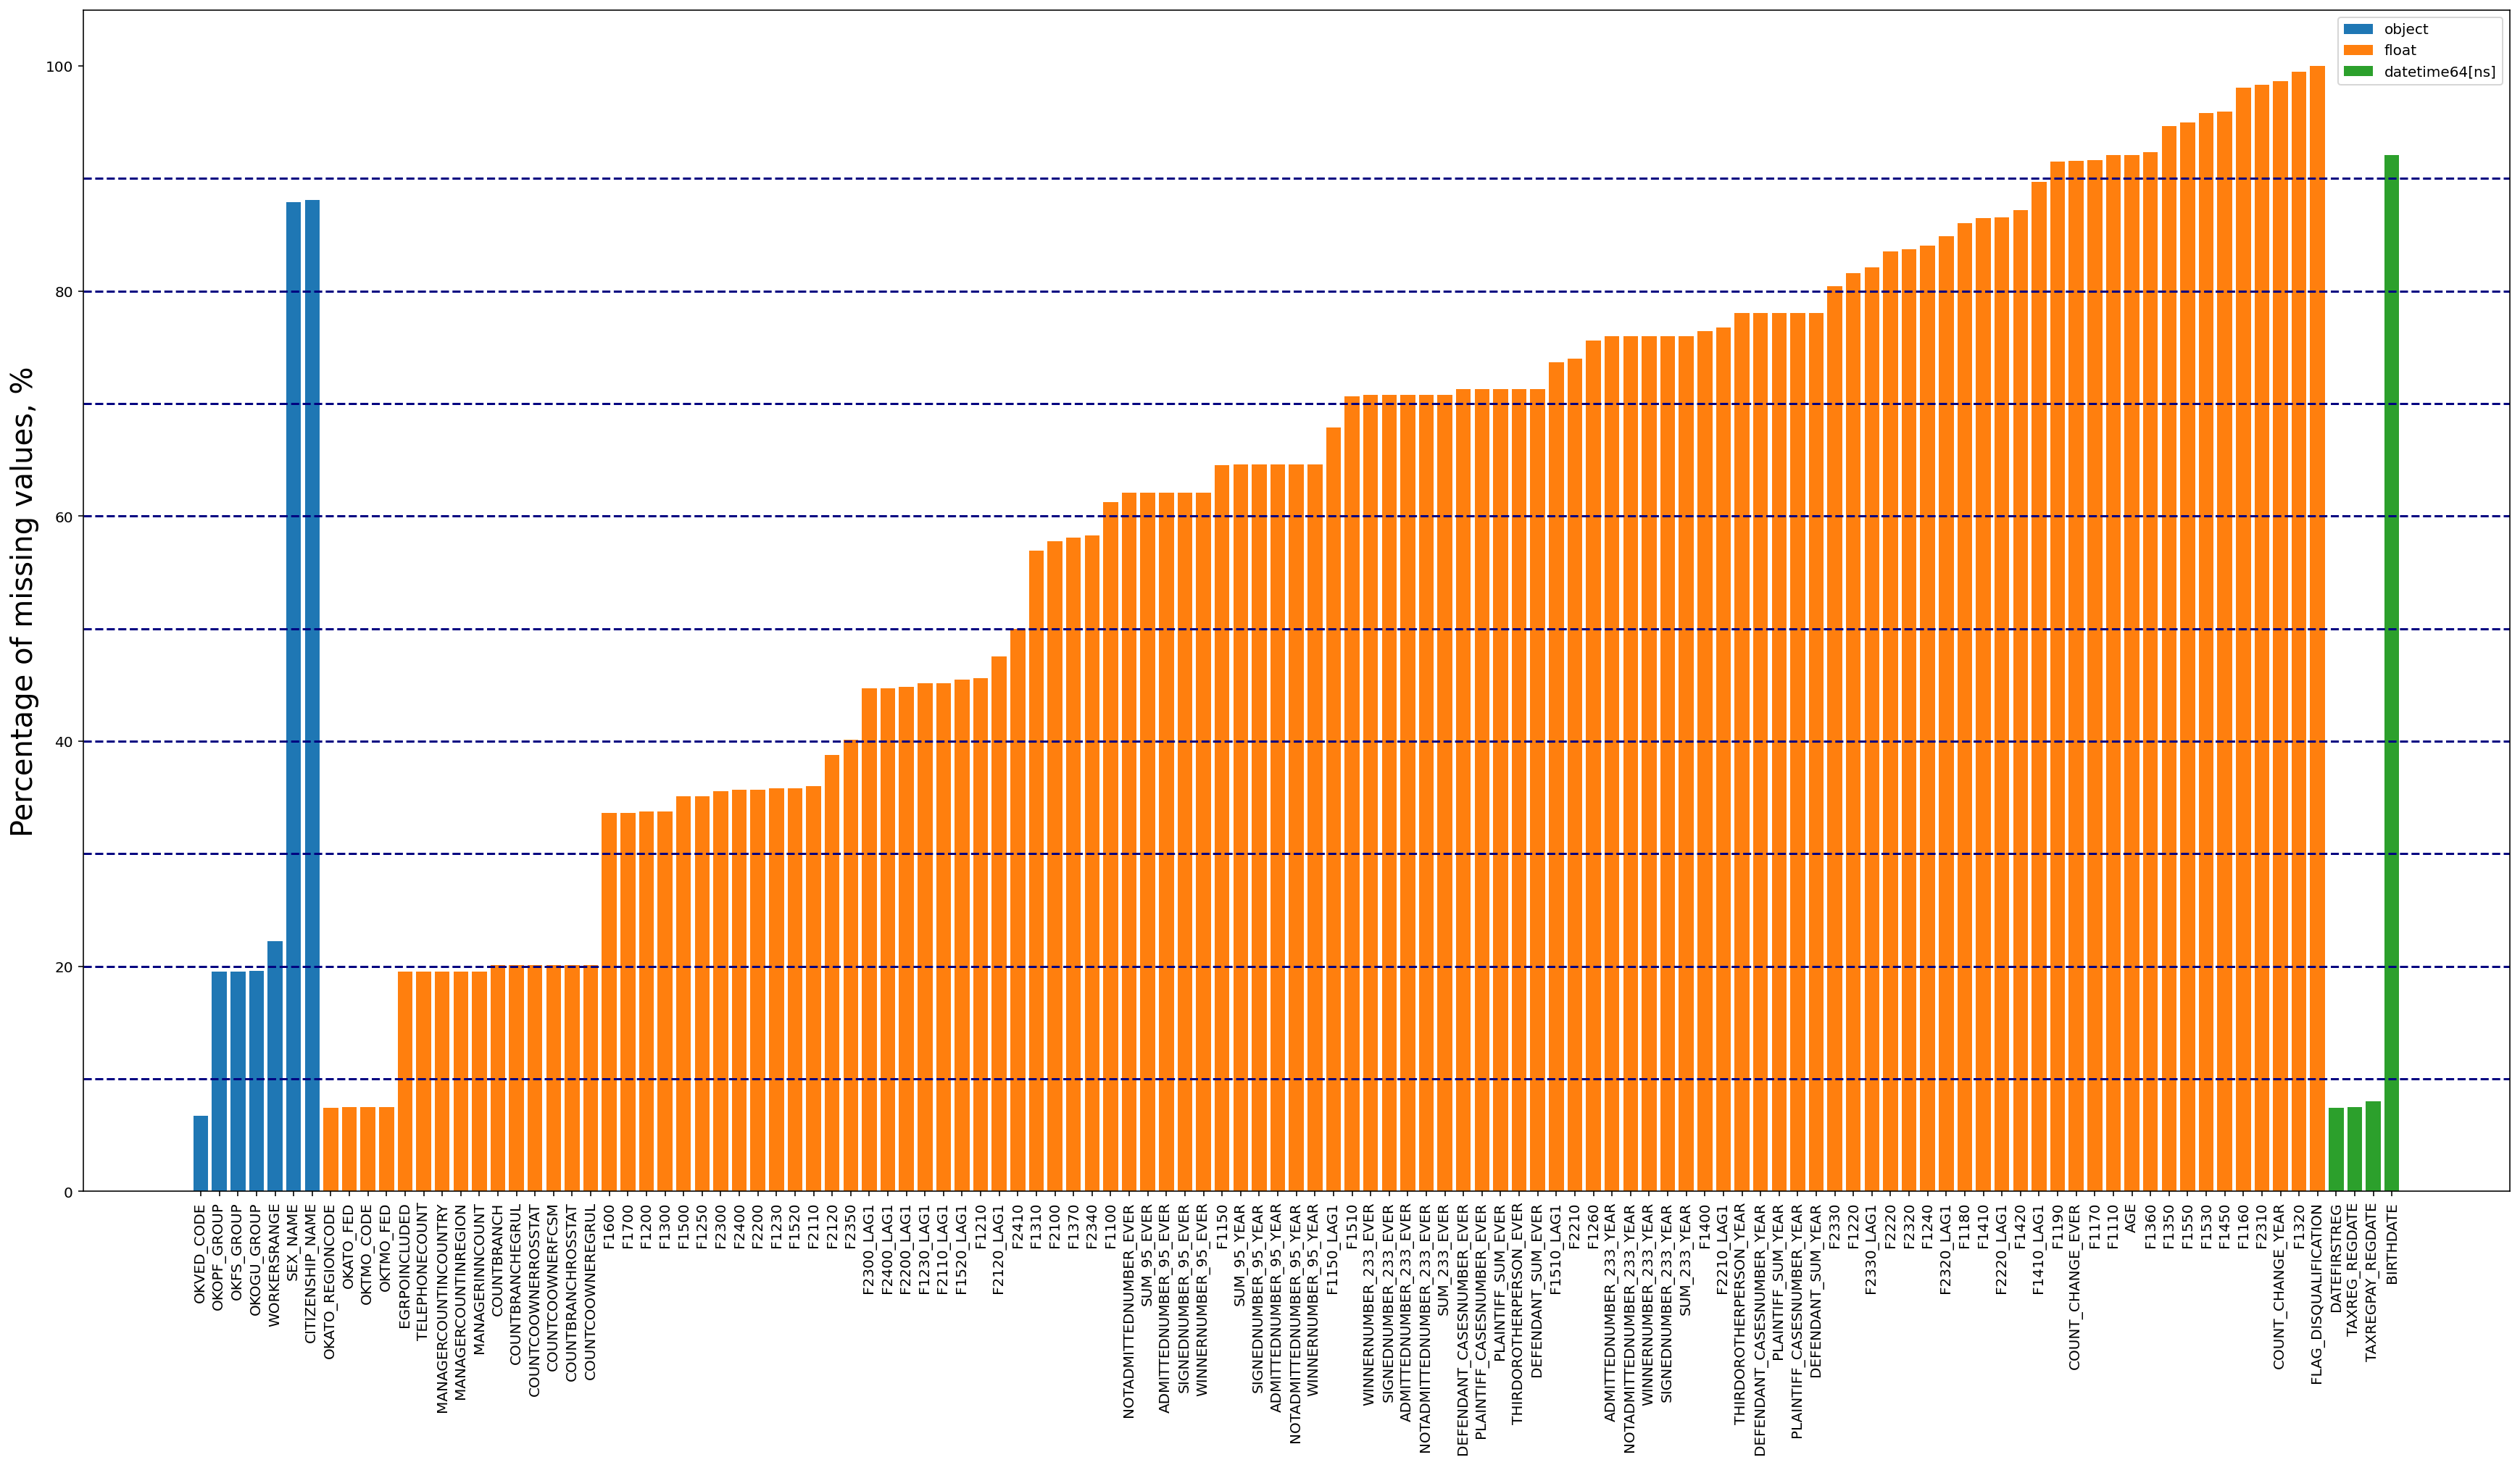

In [15]:
# Visualization information about columns with missing values
fig, ax = plt.subplots(figsize=(30, 15))
ax.bar(columns_info[columns_info['type'] == 'object']['column'], columns_info[columns_info['type'] == 'object']['percentage_of_na'], label='object')
ax.bar(columns_info[columns_info['type'] == 'float']['column'], columns_info[columns_info['type'] == 'float']['percentage_of_na'], label='float')
ax.bar(columns_info[columns_info['type'] == 'datetime64[ns]']['column'], columns_info[columns_info['type'] == 'datetime64[ns]']['percentage_of_na'], label='datetime64[ns]')
ax.tick_params(axis='x', labelrotation = 90)
ax.set_ylabel('Percentage of missing values, %', size=20)
ax.axhline(10, linestyle='--', color='navy', gid='10%')
ax.axhline(20, linestyle='--', color='navy')
ax.axhline(30, linestyle='--', color='navy')
ax.axhline(40, linestyle='--', color='navy')
ax.axhline(50, linestyle='--', color='navy')
ax.axhline(60, linestyle='--', color='navy')
ax.axhline(70, linestyle='--', color='navy')
ax.axhline(80, linestyle='--', color='navy')
ax.axhline(90, linestyle='--', color='navy')
plt.legend()
plt.show()

In [16]:
# Columns for delete from DataFrame
object_columns_for_drop = columns_info[(columns_info['percentage_of_na'] > 50) & (columns_info['type'] == 'object')]['column']
float_columns_for_drop = columns_info[(columns_info['percentage_of_na'] > 50) & (columns_info['type'] == 'float')]['column']
datetime_columns_for_drop = columns_info[(columns_info['percentage_of_na'] > 50) & (columns_info['type'] == 'datetime64[ns]')]['column']

print('Колонки типа object для удаления:', list(object_columns_for_drop))
print('Колонки типа float для удаления:', list(float_columns_for_drop))
print('Колонки типа datetime для удаления:', list(datetime_columns_for_drop))

list_with_drop_columns = list(object_columns_for_drop) + list(float_columns_for_drop) + list(datetime_columns_for_drop)

Колонки типа object для удаления: ['SEX_NAME', 'CITIZENSHIP_NAME']
Колонки типа float для удаления: ['F1310', 'F2100', 'F1370', 'F2340', 'F1100', 'NOTADMITTEDNUMBER_EVER', 'SUM_95_EVER', 'ADMITTEDNUMBER_95_EVER', 'SIGNEDNUMBER_95_EVER', 'WINNERNUMBER_95_EVER', 'F1150', 'SUM_95_YEAR', 'SIGNEDNUMBER_95_YEAR', 'ADMITTEDNUMBER_95_YEAR', 'NOTADMITTEDNUMBER_95_YEAR', 'WINNERNUMBER_95_YEAR', 'F1150_LAG1', 'F1510', 'WINNERNUMBER_233_EVER', 'SIGNEDNUMBER_233_EVER', 'ADMITTEDNUMBER_233_EVER', 'NOTADMITTEDNUMBER_233_EVER', 'SUM_233_EVER', 'DEFENDANT_CASESNUMBER_EVER', 'PLAINTIFF_CASESNUMBER_EVER', 'PLAINTIFF_SUM_EVER', 'THIRDOROTHERPERSON_EVER', 'DEFENDANT_SUM_EVER', 'F1510_LAG1', 'F2210', 'F1260', 'ADMITTEDNUMBER_233_YEAR', 'NOTADMITTEDNUMBER_233_YEAR', 'WINNERNUMBER_233_YEAR', 'SIGNEDNUMBER_233_YEAR', 'SUM_233_YEAR', 'F1400', 'F2210_LAG1', 'THIRDOROTHERPERSON_YEAR', 'DEFENDANT_CASESNUMBER_YEAR', 'PLAINTIFF_SUM_YEAR', 'PLAINTIFF_CASESNUMBER_YEAR', 'DEFENDANT_SUM_YEAR', 'F2330', 'F1220', 'F2330_L

In [17]:
# Remove columns with percentage missing values more than 50%
train = train.drop(columns=list_with_drop_columns)
test = test.drop(columns=list_with_drop_columns)

In [18]:
# Columns with missing values
na_columns = train.loc[:, train.columns[train.isna().sum() != 0]].isnull().sum().reset_index().rename(columns={'index': 'column', 0: 'NA'})

In [19]:
na_columns_type = train[list(na_columns['column'])].dtypes.reset_index().rename(columns={'index': 'column', 0: 'type'})

# Columns with missing values and types of data
na_columns_with_type = pd.merge(na_columns, na_columns_type, on='column', how='left')
na_columns_with_type.head()

,column,NA,type
0,F1200,6041,float64
1,F1210,8156,float64
2,F1230,6407,float64
3,F1250,6281,float64
4,F1300,6041,float64


In [20]:
# Lists of float, object and datetime columns with missing values
object_na = list(na_columns_with_type[na_columns_with_type['type'] == 'object'].column)
float_na = list(na_columns_with_type[na_columns_with_type['type'] == 'float'].column)
datetime_na = list(na_columns_with_type[na_columns_with_type['type'] == 'datetime64[ns]'].column)

#### Work with missing values

In [21]:
# Amount of missing values in columns with type object
train[object_na].isnull().sum()

OKFS_GROUP      3500
OKOPF_GROUP     3500
OKOGU_GROUP     3503
WORKERSRANGE    3980
OKVED_CODE      1199
dtype: int64

In [22]:
train[object_na]

,OKFS_GROUP,OKOPF_GROUP,OKOGU_GROUP,WORKERSRANGE,OKVED_CODE
0,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,1001 .. 5000,35.14
1,NaN,NaN,NaN,NaN,NaN
2,Государственная собственность,Коммерческая унитарная организация,Группировки хозяйствующих субъектов и обществе...,51 .. 100,36.00.2
3,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,501 .. 1000,35.14
4,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...
17886,Государственная собственность,Коммерческая унитарная организация,Группировки хозяйствующих субъектов и обществе...,51 .. 100,36.00.2
17887,Государственная собственность,Некоммерческая унитарная организация,Государственная власть в субъектах РФ,1001 .. 5000,86.10
17888,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,0 .. 5,46.46
17889,Частная собственность,Коммерческая корпоративная организация,Группировки хозяйствующих субъектов и обществе...,0 .. 5,46.69.9


In [23]:
object_list = list(train[object_na].columns)

# Replace missing values on the most popular values
for col in object_list:
    train[col] = train[col].fillna(train[col].value_counts().index[0])
    test[col] = test[col].fillna(train[col].value_counts().index[0])

In [24]:
train[object_na].isnull().sum()

OKFS_GROUP      0
OKOPF_GROUP     0
OKOGU_GROUP     0
WORKERSRANGE    0
OKVED_CODE      0
dtype: int64

In [25]:
# Convert to type category
train[object_na] = train[object_na].astype('category')
test[object_na] = test[object_na].astype('category')

#### Processing missing values in float columns

In [26]:
train[float_na].columns

Index(['F1200', 'F1210', 'F1230', 'F1250', 'F1300', 'F1500', 'F1520', 'F1600',
       'F1700', 'F2110', 'F2120', 'F2200', 'F2300', 'F2350', 'F2400', 'F2410',
       'F1230_LAG1', 'F1520_LAG1', 'F2110_LAG1', 'F2120_LAG1', 'F2200_LAG1',
       'F2300_LAG1', 'F2400_LAG1', 'EGRPOINCLUDED', 'OKATO_REGIONCODE',
       'OKATO_FED', 'OKTMO_CODE', 'OKTMO_FED', 'COUNTCOOWNERFCSM',
       'COUNTCOOWNERROSSTAT', 'COUNTCOOWNEREGRUL', 'COUNTBRANCH',
       'COUNTBRANCHROSSTAT', 'COUNTBRANCHEGRUL', 'TELEPHONECOUNT',
       'MANAGERCOUNTINCOUNTRY', 'MANAGERCOUNTINREGION', 'MANAGERINNCOUNT'],
      dtype='object')

In [28]:
train['MANAGERINNCOUNT'].head()

0    0.0
1    NaN
2    1.0
3    1.0
4    NaN
Name: MANAGERINNCOUNT, dtype: float64

In [29]:
train[['EGRPOINCLUDED', 'OKATO_REGIONCODE', 'OKATO_FED', 'OKTMO_CODE', 'OKTMO_FED']] = train[['EGRPOINCLUDED', 'OKATO_REGIONCODE',
                                                                                              'OKATO_FED', 'OKTMO_CODE', 
                                                                                              'OKTMO_FED']].astype('category')

#### Processing missing values in category columns

In [30]:
category_na = train[['EGRPOINCLUDED', 'OKATO_REGIONCODE', 'OKATO_FED', 'OKTMO_CODE', 'OKTMO_FED']].columns
category_list = list(category_na)

In [31]:
# Replace missing values on the most popular values
for col in category_list:
    train[col] = train[col].fillna(train[col].value_counts().index[0])
    test[col] = test[col].fillna(train[col].value_counts().index[0])

In [32]:
train[category_list].isnull().sum()

EGRPOINCLUDED       0
OKATO_REGIONCODE    0
OKATO_FED           0
OKTMO_CODE          0
OKTMO_FED           0
dtype: int64

#### Processing missing values in float columns (part II)

In [33]:
float_na = train.loc[:, train.columns[(train.isna().sum() != 0) & (train.dtypes == 'float')]].columns
for_int_list = ['COUNTCOOWNERFCSM', 'COUNTCOOWNERROSSTAT', 'COUNTCOOWNEREGRUL', 'COUNTBRANCH', 
          'COUNTBRANCHROSSTAT', 'COUNTBRANCHEGRUL', 'TELEPHONECOUNT', 'MANAGERCOUNTINCOUNTRY', 
          'MANAGERCOUNTINREGION', 'MANAGERINNCOUNT']

for col in for_int_list:
    train[col] = train[col].fillna(train[col].value_counts().index[0])
    test[col] = test[col].fillna(train[col].value_counts().index[0])

In [34]:
# Convert to type int
train[for_int_list] = train[for_int_list].astype('int')
test[for_int_list] = test[for_int_list].astype('int')

In [35]:
train.dtypes

id_contract                       int64
id_client                         int64
SIGN_DATE                datetime64[ns]
IP_flag                           int64
TARGET                            int64
F1200                           float64
F1210                           float64
F1230                           float64
F1250                           float64
F1300                           float64
F1500                           float64
F1520                           float64
F1600                           float64
F1700                           float64
F2110                           float64
F2120                           float64
F2200                           float64
F2300                           float64
F2350                           float64
F2400                           float64
F2410                           float64
F1230_LAG1                      float64
F1520_LAG1                      float64
F2110_LAG1                      float64
F2120_LAG1                      float64


In [37]:
float_na = train.loc[:, train.columns[(train.isna().sum() != 0) & (train.dtypes == 'float')]].columns

In [38]:
# Replace missing values on median values
float_cols_list = list(train[float_na].columns)

for col in float_cols_list:
    train[col] = train[col].fillna(train[col].median())
    test[col] = test[col].fillna(train[col].median())

In [39]:
# Processing missing values in datetime columns
datetime_na = train.loc[:, train.columns[(train.isna().sum() != 0) & (train.dtypes == 'datetime64[ns]')]].columns
datetime_na_list = list(datetime_na)

In [40]:
# Reformat date 'year-month-day' to format 'year'
for col in datetime_na_list:
    train[col] = train[col].dt.year
    test[col] = test[col].dt.year

In [41]:
# Replace missing values on the most popular values
for col in datetime_na_list:
    train[col] = train[col].fillna(train[col].value_counts().index[0])
    test[col] = test[col].fillna(train[col].value_counts().index[0])

In [42]:
train.head()

,id_contract,id_client,SIGN_DATE,IP_flag,TARGET,F1200,F1210,F1230,F1250,F1300,...,COUNTCOOWNERROSSTAT,COUNTCOOWNEREGRUL,COUNTBRANCH,COUNTBRANCHROSSTAT,COUNTBRANCHEGRUL,TELEPHONECOUNT,MANAGERCOUNTINCOUNTRY,MANAGERCOUNTINREGION,MANAGERINNCOUNT,OKVED_CODE
0,1,1847,2018-01-01,0,0,1.048287e+10,105901000.0,9.477348e+09,3.312980e+08,1.960896e+09,...,1,0,8,7,7,3,0,0,0,35.14
1,2,4650,2018-01-01,1,0,2.215100e+07,3955000.0,1.350100e+07,1.893000e+06,4.634000e+06,...,1,1,0,0,0,1,1,1,1,46.46
2,3,4770,2018-01-01,0,0,2.161000e+07,2378000.0,1.764200e+07,5.530000e+05,9.073600e+07,...,1,1,0,0,0,1,1,1,1,36.00.2
3,4,12237,2018-01-01,0,0,5.786965e+09,12001000.0,1.232486e+09,4.459193e+09,2.685905e+09,...,1,1,0,0,2,8,1,1,1,35.14
4,5,9988,2018-01-01,1,0,2.215100e+07,3955000.0,1.350100e+07,1.893000e+06,4.634000e+06,...,1,1,0,0,0,1,1,1,1,46.46


In [43]:
train['SIGN_DATE'] = train['SIGN_DATE'].dt.year
test['SIGN_DATE'] = test['SIGN_DATE'].dt.year

In [44]:
train[datetime_na] = train[datetime_na].astype('int')
test[datetime_na] = test[datetime_na].astype('int')

In [45]:
train.loc[:, train.dtypes == 'object'].head()

""
0
1
2
3
4


#### Coding categorical features

In [46]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

ord_enc = OrdinalEncoder()
oe_style = OneHotEncoder()

In [47]:
train['OKVED_CODE'].unique()

['35.14', '46.46', '36.00.2', '84.24', '35.12', ..., '47.24.2', '31.02', '23.6', '68.31.11', '46.15.9']
Length: 773
Categories (773, object): ['01.1', '01.11', '01.11.1', '01.13', ..., '96.03', '96.04', '96.09', '97.00']

In [48]:
for_onehot_encoder = ['OKFS_GROUP', 'OKOPF_GROUP', 'OKOGU_GROUP']

In [55]:
for_ordinal_encoder = ['OKATO_REGIONCODE', 'OKATO_FED', 'OKTMO_CODE', 'OKTMO_FED', 'WORKERSRANGE', 'OKVED_CODE']

In [59]:
# Coding categorical features with ordinal encoder

for name in for_ordinal_encoder:
    ord_enc.fit(train[[name]])
    train[name] = ord_enc.transform(train[[name]])
    test[name] = ord_enc.transform(test[[name]])

In [49]:
train['EGRPOINCLUDED'] = train['EGRPOINCLUDED'].astype('float')

In [50]:
# Coding categorical features with OneHotEncoder

for name in for_onehot_encoder:
    # для тренировочных данных
    oe_style = OneHotEncoder()
    oe_style.fit(train[[name]])
    oe_result_train = oe_style.transform(train[[name]])
    oe_result_test = oe_style.transform(test[[name]])
    train = train.join(pd.DataFrame(oe_result_train.toarray(), columns=oe_style.categories_))
    test = test.join(pd.DataFrame(oe_result_test.toarray(), columns=oe_style.categories_))

In [51]:
train = train.drop(columns=for_onehot_encoder)
test = test.drop(columns=for_onehot_encoder)

#### Scaler features

In [52]:
from sklearn.preprocessing import StandardScaler, Normalizer, MinMaxScaler, scale

In [53]:
target = train['TARGET']
train = train.drop(columns='TARGET')

In [54]:
# scaler = StandardScaler()
scaler = Normalizer(norm='l1')

In [55]:
data = scaler.fit_transform(train)

In [56]:
data_train = pd.DataFrame(data, columns=train.columns)

In [58]:
# scaler = StandardScaler()
scaler = Normalizer(norm='l1')
data = scaler.fit_transform(test)
data_test = pd.DataFrame(data, columns=test.columns)

#### Heatmap

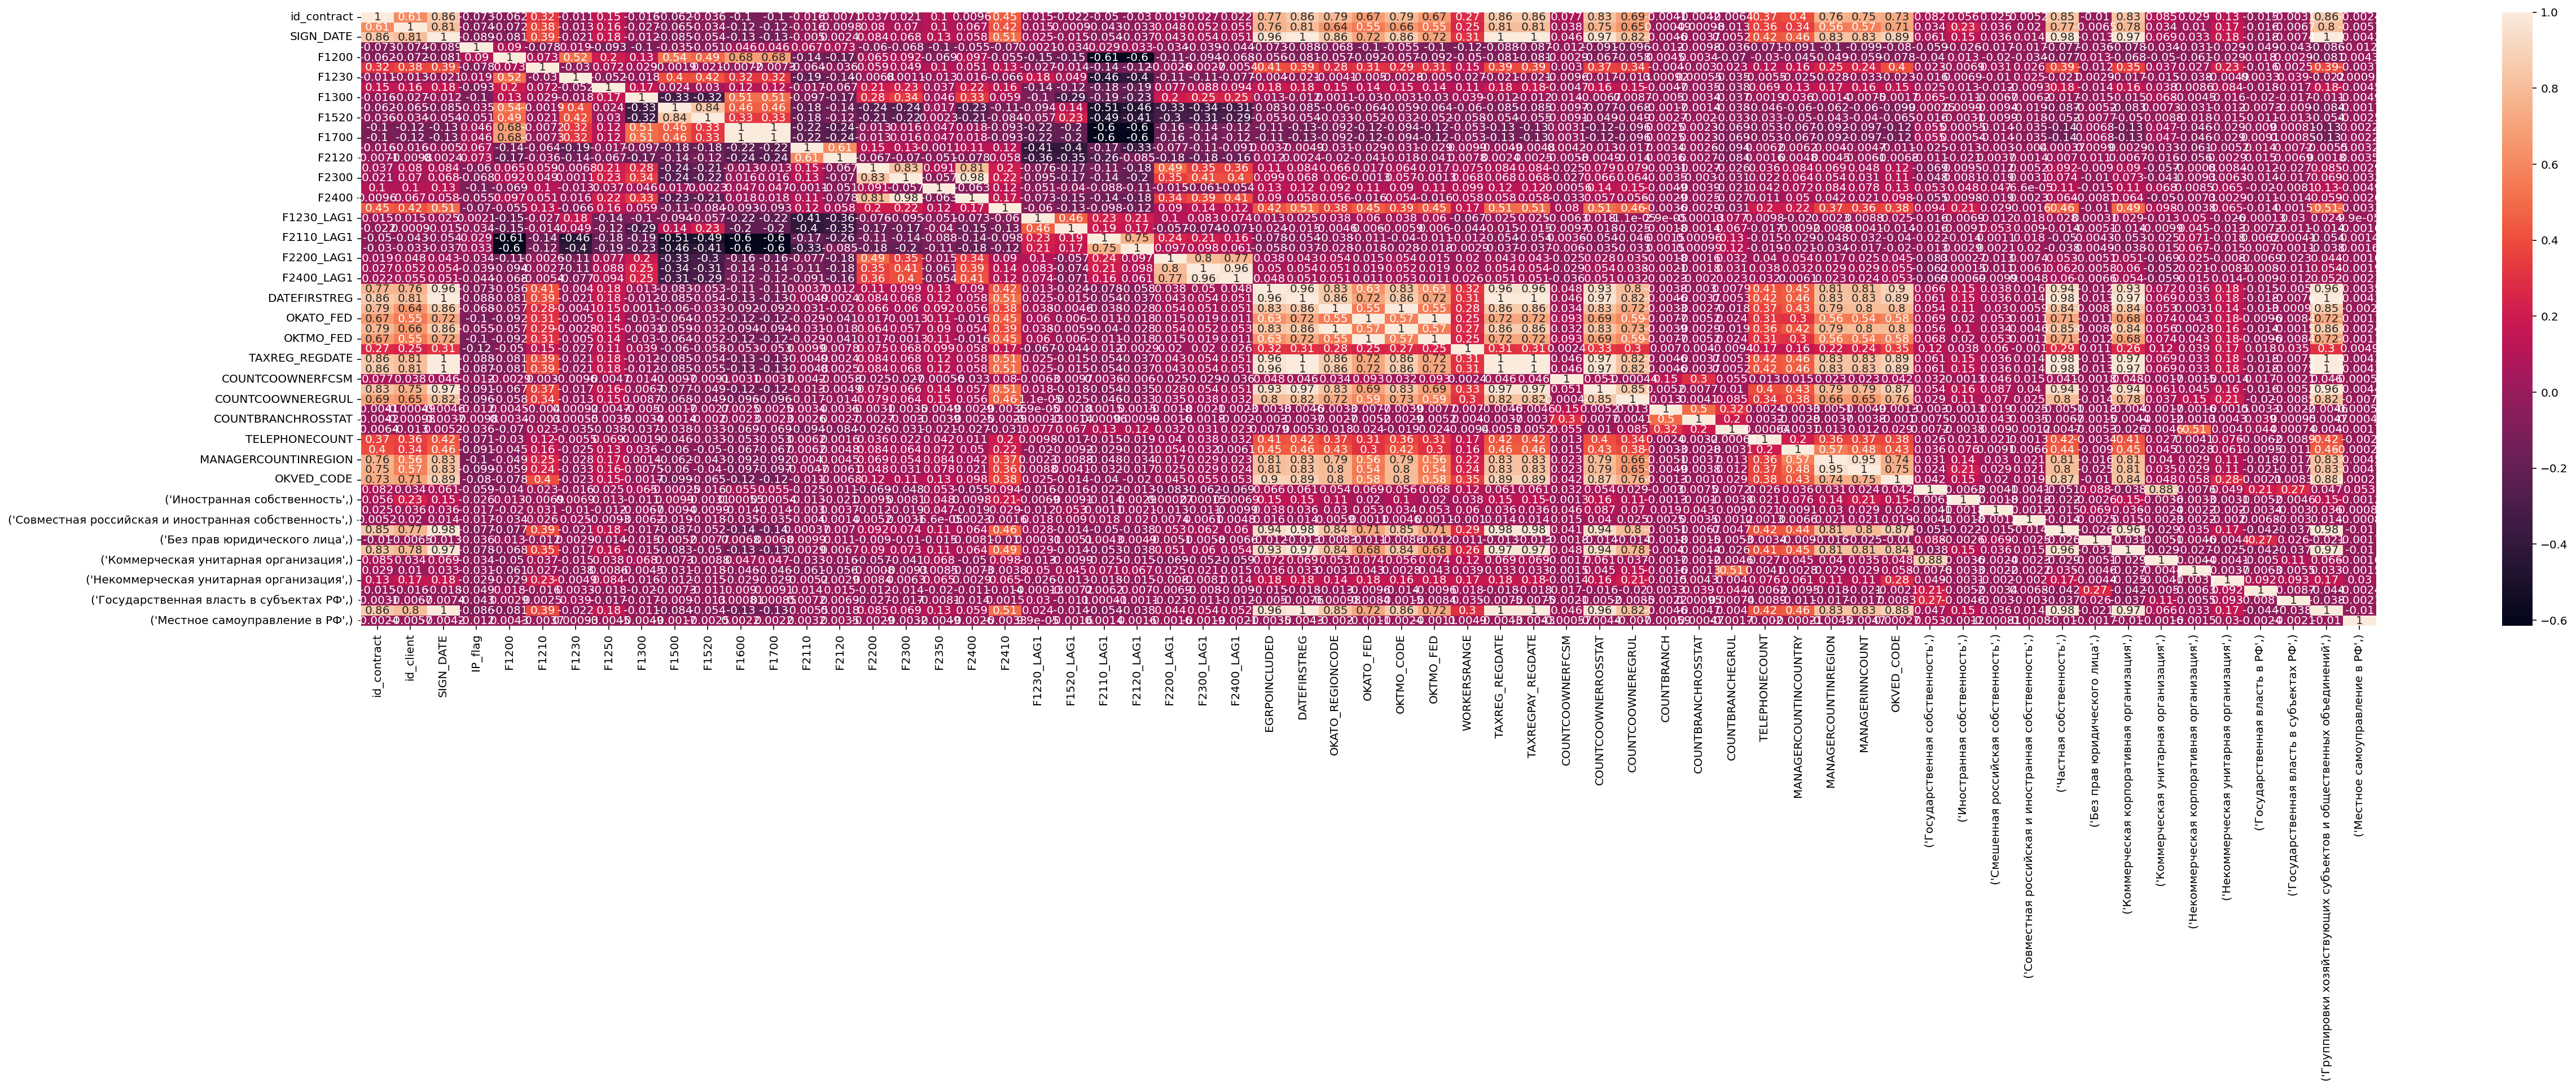

In [60]:
# Create heatmap
train_corr = data_train.corr()
plt.figure(figsize=(40, 10))
sns.heatmap(train_corr, annot=True)
plt.show()

#### Using PCA

In [62]:
data_train.shape

(17891, 61)

In [65]:
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV

In [66]:
X = data_train.copy()

In [67]:
pca_params = {'n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 
                              19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]}
pca = PCA(random_state=1)

In [68]:
clf = GridSearchCV(pca, pca_params)

In [69]:
pca_cv = clf.fit(X)

In [70]:
pca_cv.best_estimator_

PCA(n_components=13, random_state=1)

In [71]:
pca = PCA(n_components=13, random_state=1)
X_transformed = pca.fit_transform(X)

In [72]:
X_transformed.shape

(17891, 13)

In [73]:
X_test = data_test.copy()
X_transformed_test = pca.fit_transform(X_test)

In [74]:
X_transformed_test.shape

(7330, 13)

#### Create model

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold, cross_val_score
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, target, test_size=.2, random_state=1)

#### XGBClassifier

In [64]:
xgb_model = XGBClassifier()
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 10, random_state=1)
n_scores = cross_val_score(xgb_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print('Точность: {} ({})'.format(np.mean(n_scores), np.std(n_scores)))

xgb_model.fit(X_train, y_train)
xgb_pred = xgb_model.predict_proba(X_test)

In [149]:
xgb_pred[:, 1]

array([1.8100765e-03, 9.7892922e-01, 2.5111368e-02, ..., 8.9413249e-01,
       9.5026308e-01, 4.4481899e-04], dtype=float32)

In [1]:
metric_xgb = roc_auc_score(y_test, xgb_pred[:, 1])
print(metric_xgb)

#### GradientBoostingClassifier

In [167]:
gb_params = {'n_estimators': 150, 
             'loss': 'deviance', 
             'learning_rate': 0.03, 
             'min_samples_split': 10, 
             'min_samples_leaf': 10,
             'max_depth': 12, 
             'max_features': 'auto'}

In [168]:
gb_classifier = GradientBoostingClassifier(**gb_params)
gb_model = gb_classifier.fit(X_train, y_train)
gb_pred = gb_model.predict_proba(X_test)
metric = roc_auc_score(y_test, gb_pred[:, 1])
print(metric)

0.9609037718700295


#### CatBoost

In [61]:
cb_model = CatBoostClassifier(verbose=0, n_estimators=100)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats = 3, random_state=1)
n_scores = cross_val_score(cb_model, X_train, y_train, scoring='roc_auc', cv=cv, n_jobs=-1, error_score='raise')
print('Точность: {} ({})'.format(np.mean(n_scores), np.std(n_scores)))

Точность: 0.9436025936760696 (0.006312867173992275)


In [62]:
cb_model.fit(X_train, y_train)
cb_pred = cb_model.predict_proba(X_test)
metric_cb = roc_auc_score(y_test, cb_pred[:, 1])
print(metric_cb)

0.9455863595050712


#### Create submission

In [150]:
xgb_pred_result = xgb_model.predict_proba(data_test)

In [151]:
xgb_pred_result[:, 1]

array([0.40683287, 0.00724562, 0.02361426, ..., 0.77937645, 0.35894772,
       0.00525755], dtype=float32)

In [152]:
test['TARGET'] = xgb_pred_result[:, 1]

In [153]:
test[['id_contract', 'TARGET']].to_csv('my_submission.csv', sep=';', index=False)
test[['id_contract', 'TARGET']].head()

,id_contract,TARGET
0,17892,0.406833
1,17893,0.007246
2,17894,0.023614
3,17895,0.287959
4,17896,0.914730
